In [69]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import os
#Set working directory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
import matplotlib.ticker as ticker
import itertools
import datetime
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

from imblearn.over_sampling import RandomOverSampler, SMOTE

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

sns.set_style('whitegrid')

%matplotlib inline

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [92]:
cc_fraud = pd.read_csv("training_data.csv")
cc_clslab=pd.read_csv("train_data_classlabels.csv")
cc_test=pd.read_csv("testing_data.csv")
print("Number of instances: %d" % cc_fraud.shape[0])
print("Number of features: %d" % cc_fraud.shape[1])
cc_fraud.head()

Number of instances: 57116
Number of features: 30


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,50920,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,-0.411854,...,0.086793,0.112405,0.221430,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463,76.10
1,34737,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,0.179203,...,-0.087916,0.055098,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,5.95
2,11090,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,0.995869,...,-0.059598,0.055236,0.312846,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127,14.95
3,23194,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,1.207850,...,0.155066,0.085733,0.445599,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911,76.60
4,38531,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,-0.260688,...,0.073293,0.062741,0.503452,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859,30.54


In [18]:
cc_fraud['Amount']

0         76.10
1          5.95
2         14.95
3         76.60
4         30.54
          ...  
57111    496.74
57112    109.12
57113    333.00
57114     94.90
57115      0.01
Name: Amount, Length: 57116, dtype: float64

In [74]:
cc_clslab

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
57111,0.0
57112,0.0
57113,0.0
57114,0.0


In [19]:
print(cc_fraud.shape)
print(cc_clslab.shape)
print(cc_test.shape)

(57116, 30)
(57116, 1)
(14280, 30)


In [20]:
cc_fraud.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object

In [71]:
# Missing values
na_perc = {}
for col in cc_fraud.columns:
    na_perc[col] = cc_fraud[col].isnull().sum()*100/len(cc_fraud)
na_perc

{'Time': 0.0,
 'V1': 0.0,
 'V2': 0.0,
 'V3': 0.0,
 'V4': 0.0,
 'V5': 0.0,
 'V6': 0.0,
 'V7': 0.0,
 'V8': 0.0,
 'V9': 0.0,
 'V10': 0.0,
 'V11': 0.0,
 'V12': 0.0,
 'V13': 0.0,
 'V14': 0.0,
 'V15': 0.0,
 'V16': 0.0,
 'V17': 0.0,
 'V18': 0.0,
 'V19': 0.0,
 'V20': 0.0,
 'V21': 0.0,
 'V22': 0.0,
 'V23': 0.0,
 'V24': 0.0,
 'V25': 0.0,
 'V26': 0.0,
 'V27': 0.0,
 'V28': 0.0,
 'Amount': 0.0,
 'Class': 0.0,
 'scaled_amount': 0.0,
 'scaled_time': 0.0}

In [73]:
# Missing values
na_perc = {}
for col in cc_clslab.columns:
    na_perc[col] = cc_clslab[col].isnull().sum()*100/len(cc_fraud)
na_perc

{'Class': 0.0}

In [22]:
# Determine number of fraud cases in dataset
fraud = cc_clslab[cc_clslab['Class'] == 1]
valid = cc_clslab[cc_clslab['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(cc_clslab[cc_clslab['Class'] == 1])))
print('Valid Transactions: {}'.format(len(cc_clslab[cc_clslab['Class'] == 0])))

0.002492364938392951
Fraud Cases: 142
Valid Transactions: 56974


In [23]:
print('No Frauds', round(cc_clslab['Class'].value_counts()[0]/len(cc_clslab) * 100,2), '% of the dataset')
print('Frauds', round(cc_clslab['Class'].value_counts()[1]/len(cc_clslab) * 100,2), '% of the dataset')

No Frauds 99.75 % of the dataset
Frauds 0.25 % of the dataset


### Representing data using corelation heatmap

Text(0.5, 1.0, 'Correlation heatmap for the features')

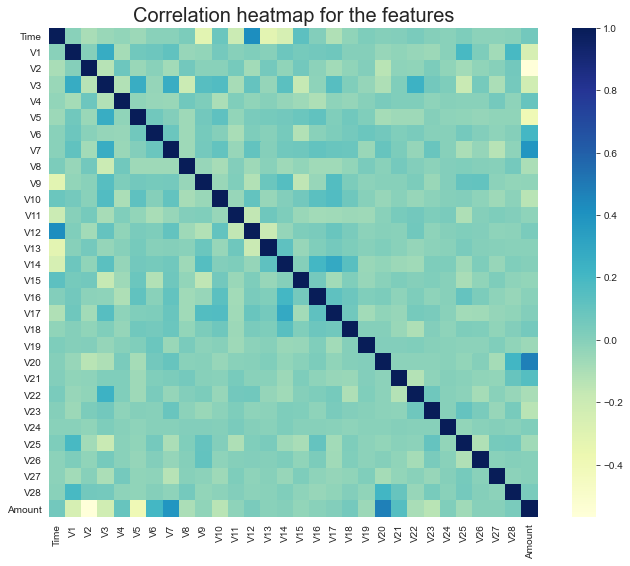

In [24]:
# Feature correlations - ideally should be uncorrelated since they are different components from PCA
corrmat = cc_fraud.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square = True, cmap = 'YlGnBu')
plt.title('Correlation heatmap for the features', fontsize=20)

Text(0.5, 1.0, 'Correlation heatmap for the features')

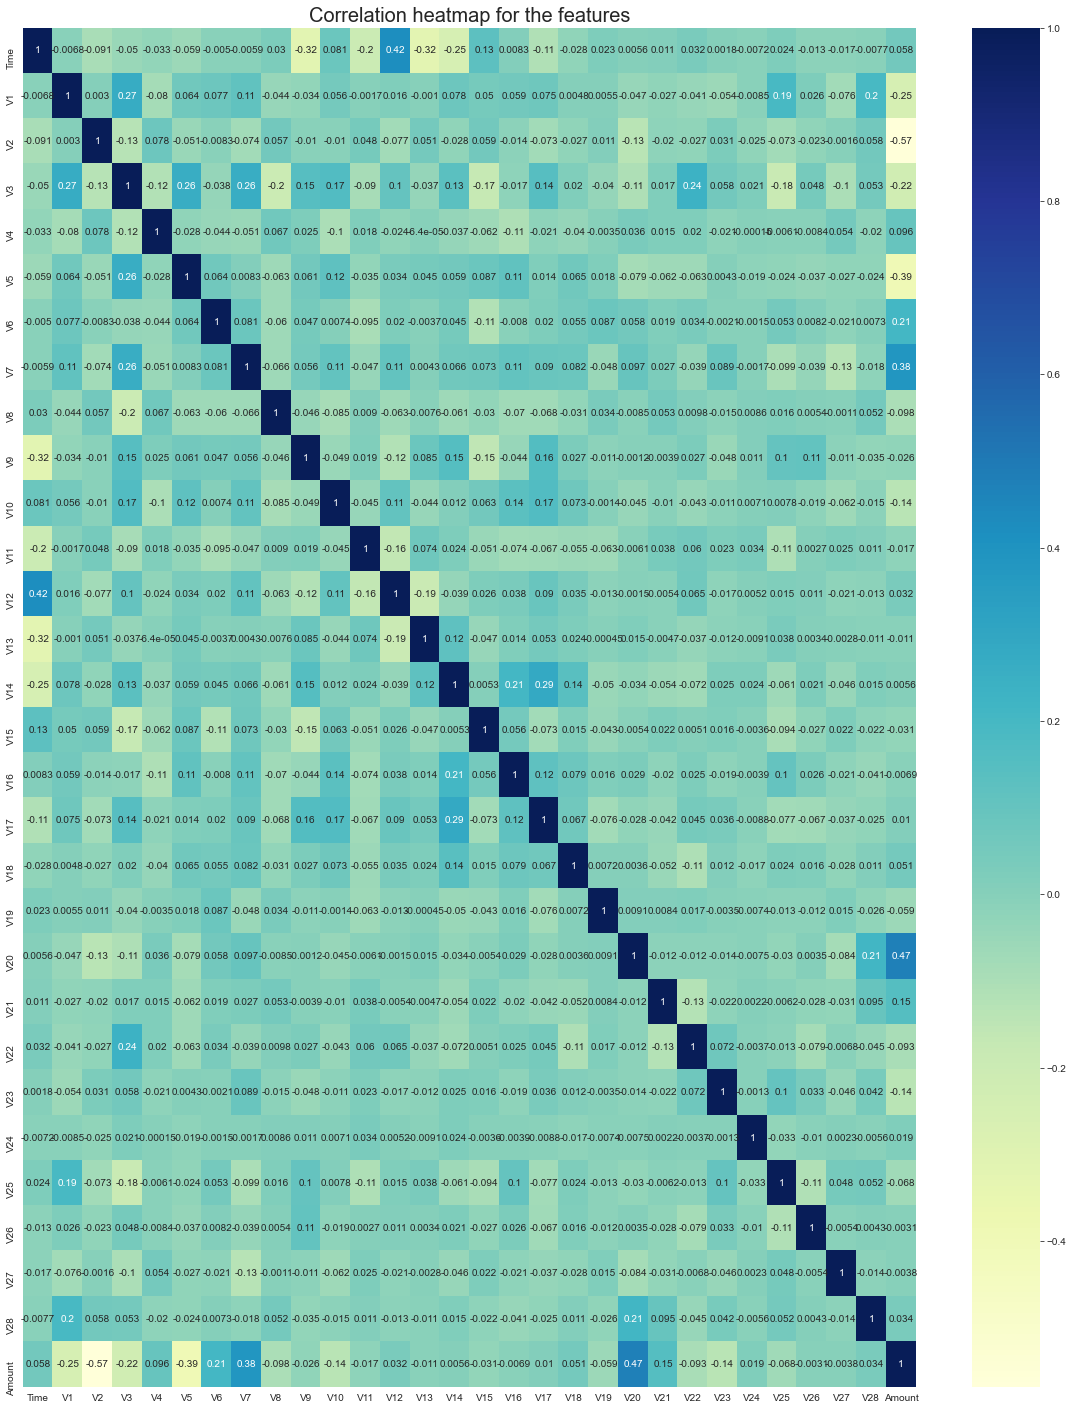

In [25]:
corrmat = cc_fraud.corr()

f, ax = plt.subplots(figsize=(20, 25))

sns.heatmap(corrmat,annot = True, cmap = 'YlGnBu')
plt.title('Correlation heatmap for the features', fontsize=20)

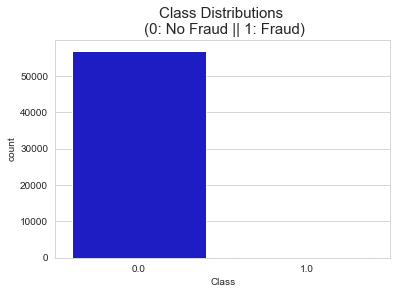

In [26]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=cc_clslab, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=15)
plt.show()

In [27]:
data2= cc_fraud['Amount']
data1= cc_clslab['Class']
df= pd.DataFrame(data1)
df['Amount'] = data2
#pd.merge(data1, data2,left_on="Class", right_on="Amount")
df
#data2.head()

,Class,Amount
0,0.0,76.10
1,0.0,5.95
2,0.0,14.95
3,0.0,76.60
4,0.0,30.54
...,...,...
57111,0.0,496.74
57112,0.0,109.12
57113,0.0,333.00
57114,0.0,94.90


(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

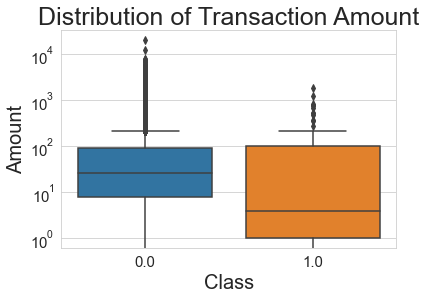

In [32]:
# Analysis of fraud by the total amount spent
plt.figure()
plt.yscale('log')
sns.set_context({"figure.figsize": (10, 8)})
g = sns.boxplot(data=df, x = 'Class', y = 'Amount')
plt.title("Distribution of Transaction Amount", fontsize=25)
plt.xlabel('Class', fontsize=20); plt.xticks(fontsize=15)
plt.ylabel('Amount', fontsize=20); plt.yticks(fontsize=15)

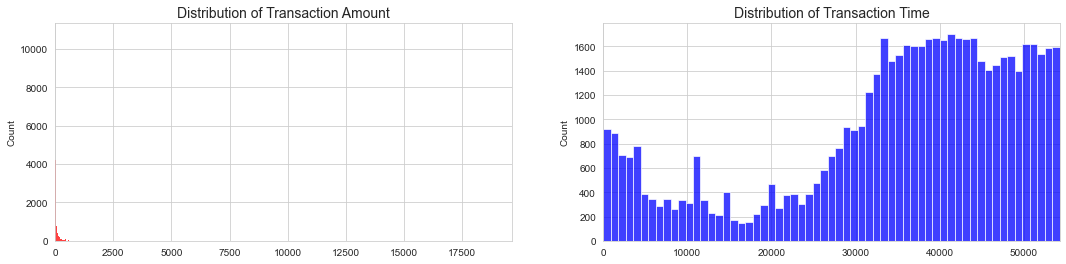

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = cc_fraud['Amount'].values
time_val = cc_fraud['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

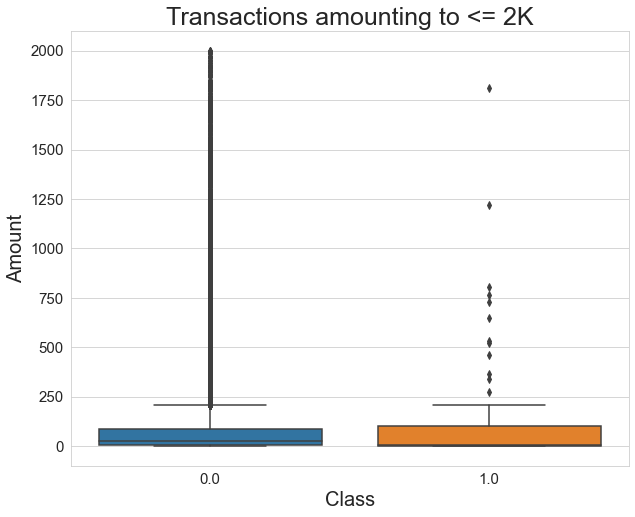

In [33]:
plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.boxplot(data=df.loc[df.Amount <= 2000,:], x = 'Class', y = 'Amount')
plt.title("Transactions amounting to <= 2K", fontsize=25)
plt.xlabel('Class', fontsize=20); plt.xticks(fontsize=15)
plt.ylabel('Amount', fontsize=20); plt.yticks(fontsize=15)

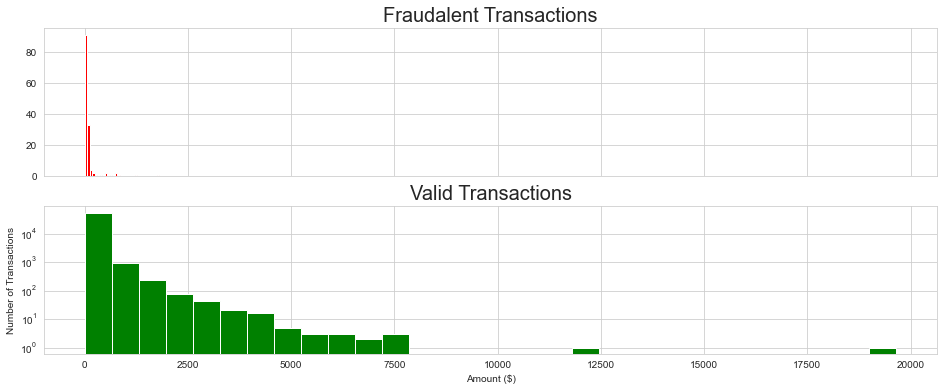

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))


ax1.hist(df.Amount[df.Class == 1], bins = 30, color='red')
ax1.set_title('Fraudalent Transactions', fontsize=20)

ax2.hist(df.Amount[df.Class == 0], bins = 30, color='green')
ax2.set_title('Valid Transactions', fontsize=20)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()


In [51]:
cc= pd.DataFrame(cc_fraud)
cc['Class']=cc_clslab
cc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,50920,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,-0.411854,...,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463,76.10,0.0,0.619838,0.742537
1,34737,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,0.179203,...,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,5.95,0.0,-0.252674,-0.201450
2,11090,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,0.995869,...,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127,14.95,0.0,-0.140734,-1.580826
3,23194,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,1.207850,...,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911,76.60,0.0,0.626057,-0.874776
4,38531,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,-0.260688,...,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859,30.54,0.0,0.053172,0.019862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57111,31552,0.458761,-2.050144,-0.466434,-0.042731,-1.449051,-0.904008,0.379405,-0.383444,-0.750893,...,-0.428028,0.451232,0.230248,1.041581,-0.165922,0.081869,496.74,0.0,5.851679,-0.387237
57112,42544,0.954816,-0.719838,0.901751,0.080120,-0.814359,0.654128,-0.647104,0.285089,0.819952,...,-0.042204,-0.192197,0.070007,0.961082,-0.034767,0.016900,109.12,0.0,1.030535,0.253948
57113,41172,-0.926829,-0.886473,2.370167,0.300101,-2.076338,1.149399,0.555557,0.376249,1.209615,...,0.677804,0.472248,-0.166598,1.069099,-0.068823,0.045220,333.00,0.0,3.815112,0.173917
57114,41560,0.939876,-0.143305,0.409470,1.401199,-0.315610,0.041466,0.057357,0.118171,0.069849,...,-0.121116,0.225331,0.559770,-0.350135,0.017372,0.021977,94.90,0.0,0.853669,0.196550


(0.0, 54280.0)

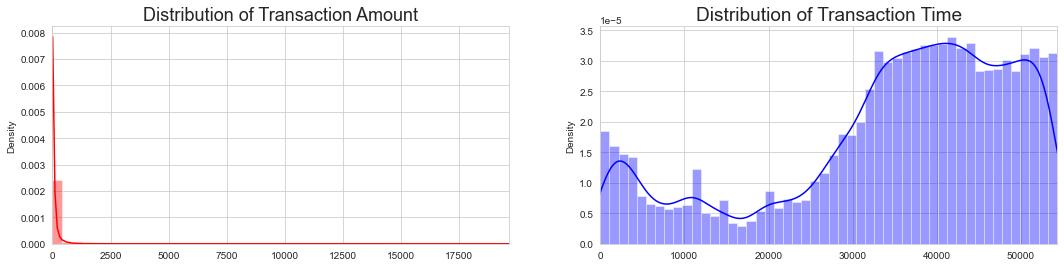

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = cc['Amount'].values
time_val = cc['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=18)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=19)
ax[1].set_xlim([min(time_val), max(time_val)])

(0.0, 54280.0)

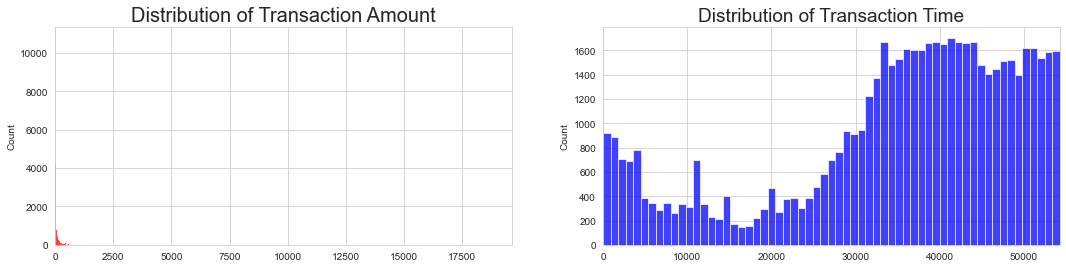

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = cc['Amount'].values
time_val = cc['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=20)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=19)
ax[1].set_xlim([min(time_val), max(time_val)])

<Figure size 720x576 with 0 Axes>

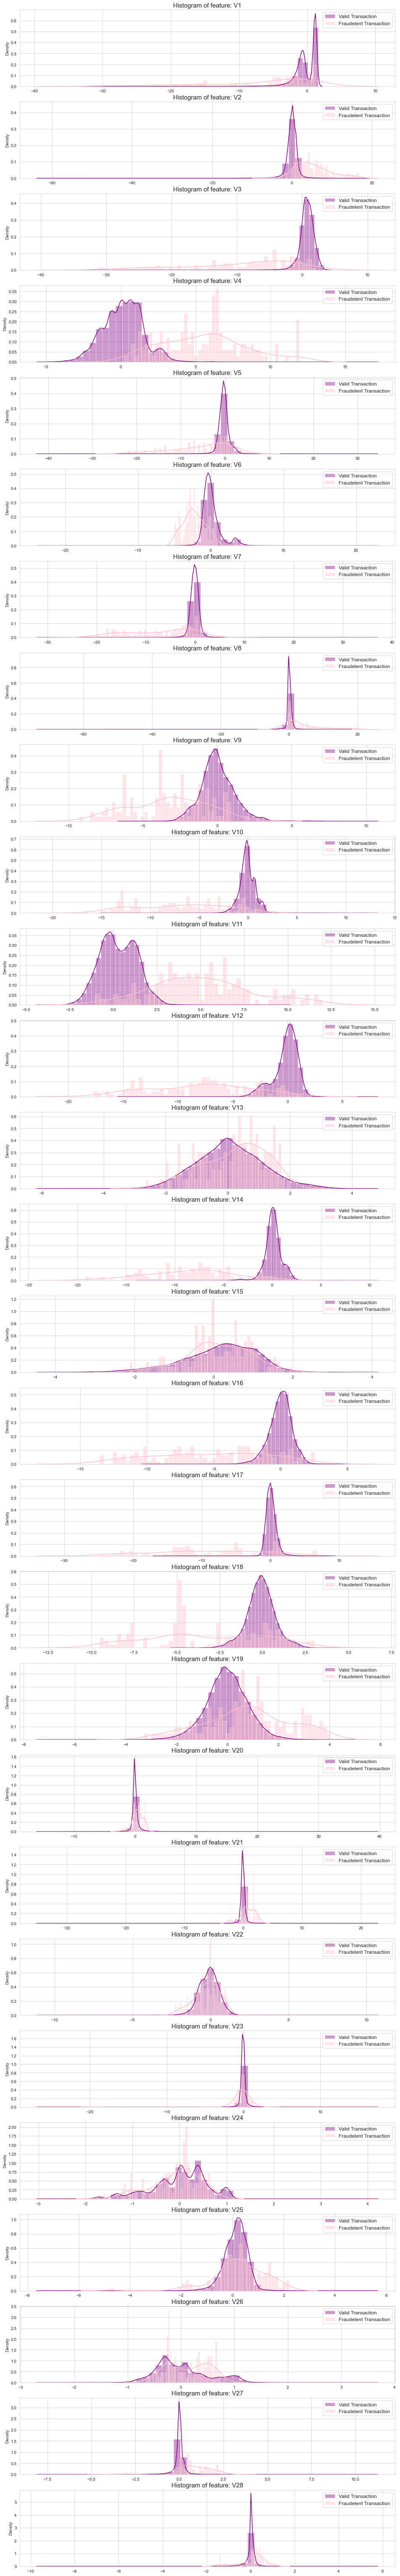

In [22]:
plt.clf()
pca_features = cc.columns[1:29]
plt.figure(figsize=(16,28*4))
gs = gridspec.GridSpec(28, 1)
for i, col in enumerate(cc[pca_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(cc[col][cc.Class ==0], bins=50, label='Valid Transaction', color='purple')
    sns.distplot(cc[col][cc.Class == 1], bins=50, label='Fraudelent Transaction', color='pink')
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: ' + str(col),fontsize=15)
    plt.legend(loc='best',fontsize=12)
plt.show()

# Scaling Amount and time 

In [53]:
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.


rob_scaler = RobustScaler()

cc['scaled_amount'] = rob_scaler.fit_transform(cc['Amount'].values.reshape(-1,1))
cc['scaled_time'] = rob_scaler.fit_transform(cc['Time'].values.reshape(-1,1))

cc.drop(['Time','Amount'], axis=1, inplace=True)

In [54]:
scaled_amount = cc['scaled_amount']
scaled_time = cc['scaled_time']

cc.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
cc.insert(0, 'scaled_amount', scaled_amount)
cc.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled

cc.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.619838,0.742537,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,...,0.086793,0.112405,0.221430,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463,0.0
1,-0.252674,-0.201450,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,...,-0.087916,0.055098,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,0.0
2,-0.140734,-1.580826,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,...,-0.059598,0.055236,0.312846,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127,0.0
3,0.626057,-0.874776,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,...,0.155066,0.085733,0.445599,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911,0.0
4,0.053172,0.019862,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,...,0.073293,0.062741,0.503452,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859,0.0


In [55]:
cc.drop_duplicates(inplace=True)

In [56]:
cc

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.619838,0.742537,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,...,0.086793,0.112405,0.221430,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463,0.0
1,-0.252674,-0.201450,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,...,-0.087916,0.055098,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,0.0
2,-0.140734,-1.580826,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,...,-0.059598,0.055236,0.312846,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127,0.0
3,0.626057,-0.874776,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,...,0.155066,0.085733,0.445599,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911,0.0
4,0.053172,0.019862,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,...,0.073293,0.062741,0.503452,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57111,5.851679,-0.387237,0.458761,-2.050144,-0.466434,-0.042731,-1.449051,-0.904008,0.379405,-0.383444,...,0.452662,-0.160474,-1.002111,-0.428028,0.451232,0.230248,1.041581,-0.165922,0.081869,0.0
57112,1.030535,0.253948,0.954816,-0.719838,0.901751,0.080120,-0.814359,0.654128,-0.647104,0.285089,...,0.173407,-0.105128,-0.227548,-0.042204,-0.192197,0.070007,0.961082,-0.034767,0.016900,0.0
57113,3.815112,0.173917,-0.926829,-0.886473,2.370167,0.300101,-2.076338,1.149399,0.555557,0.376249,...,0.599251,0.165073,0.376110,0.677804,0.472248,-0.166598,1.069099,-0.068823,0.045220,0.0
57114,0.853669,0.196550,0.939876,-0.143305,0.409470,1.401199,-0.315610,0.041466,0.057357,0.118171,...,-0.036664,0.011079,0.015211,-0.121116,0.225331,0.559770,-0.350135,0.017372,0.021977,0.0


In [ ]:
cc = cc.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = cc.loc[cc['Class'] == 1]
non_fraud_df = cc.loc[cc['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

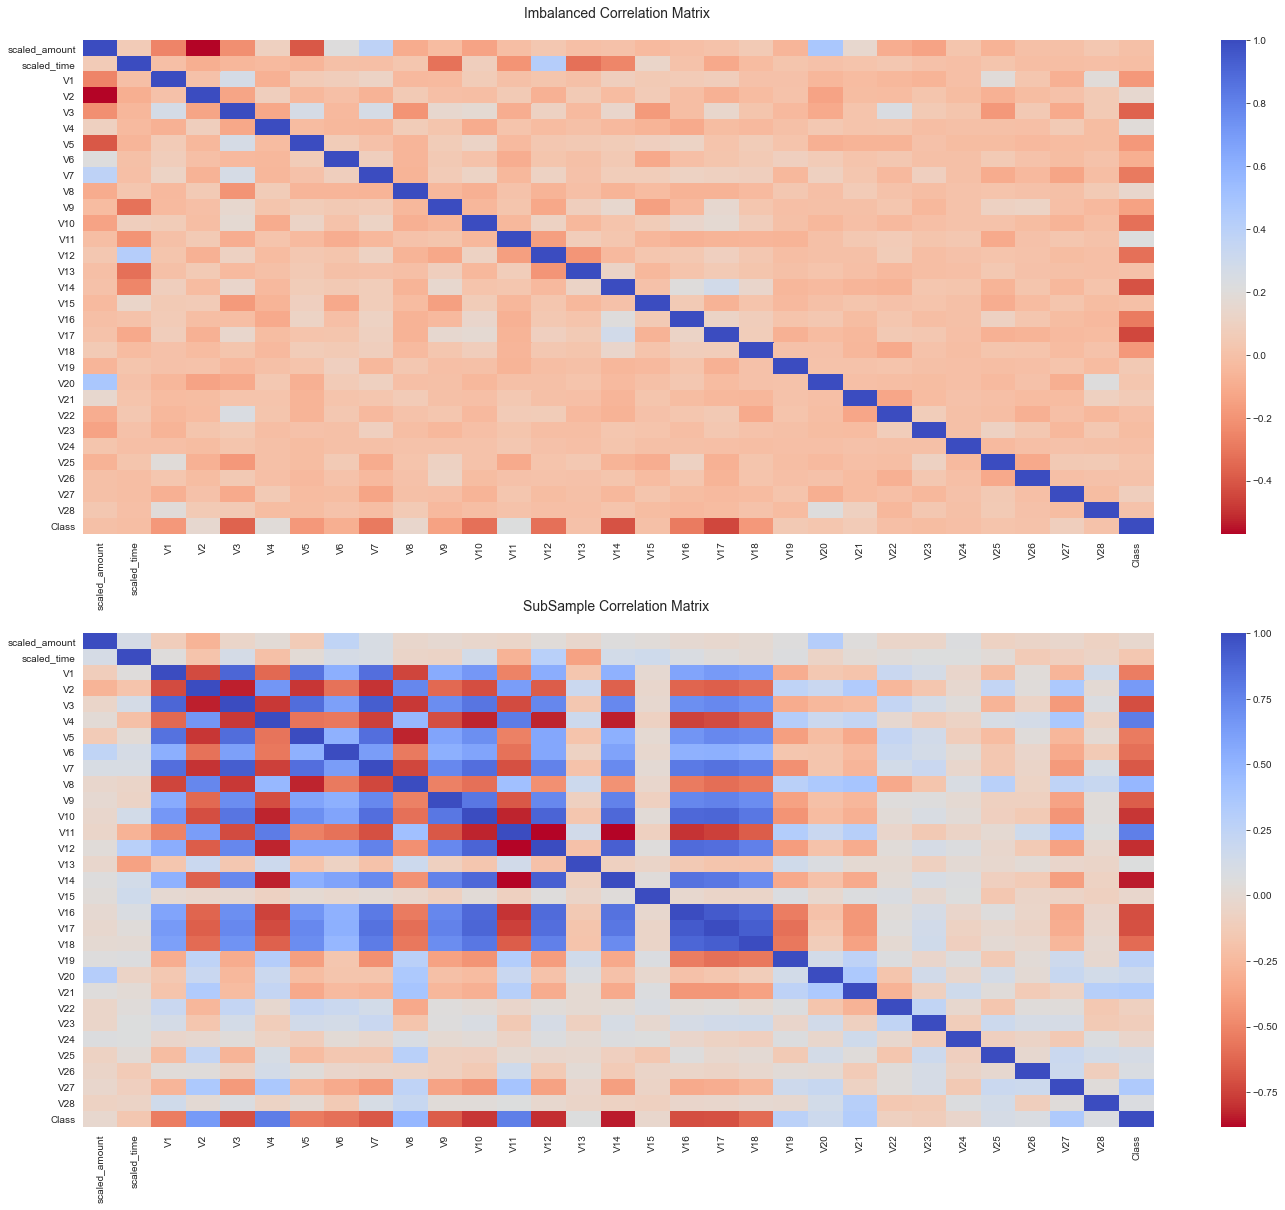

In [130]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = cc.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n ", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n ', fontsize=14)
plt.show()

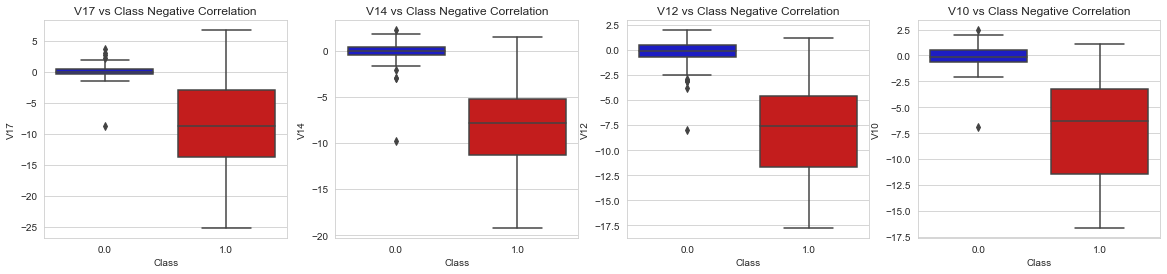

In [29]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

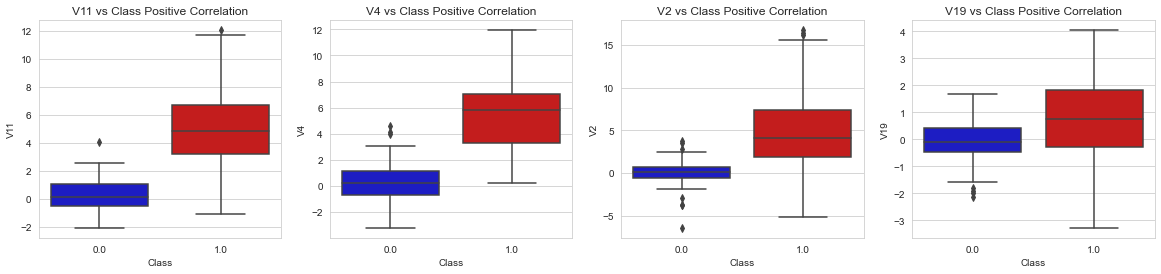

In [30]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [40]:
cc.shape

(56935, 31)

In [41]:
X = cc.drop('Class', axis = 1).values
y = cc['Class'].values

# Implementing and Comparing Models Without Sampling 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)

In [43]:
def ml_model(X_train,X_test, y_train, y_test):
    MLA = [LogisticRegression(),KNeighborsClassifier(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
    MLA_columns = []
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    row_index = 0
    for alg in MLA:
        predicted = alg.fit(X_train, y_train).predict(X_test)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 2)
        MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 2)
        MLA_compare.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted),2)
        MLA_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),2)
        MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(y_test, predicted),2)
        row_index+=1
    MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
    return MLA_compare  
ml_model(X_train,X_test, y_train, y_test)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LogisticRegression,1.00,1.00,0.74,0.56,0.63
1,KNeighborsClassifier,1.00,1.00,0.97,0.81,0.88
3,SVC,1.00,1.00,1.00,0.78,0.88
4,DecisionTreeClassifier,1.00,1.00,0.84,0.75,0.79
5,RandomForestClassifier,1.00,1.00,1.00,0.81,0.89
2,GaussianNB,0.98,0.98,0.10,0.86,0.18


# Implementing and Comparing Models With Sampling 

### Performing undersampling On the DataSet

In [61]:
from imblearn.under_sampling import RandomUnderSampler
print('before undersampling:',Counter(y_train))
undersample = RandomUnderSampler(sampling_strategy='0.5')
X_train1, y_train1 = undersample.fit_resample(X_train, y_train)
print('After undersampling:',Counter(y_train1))

before undersampling: Counter({0.0: 42595, 1.0: 106})
After undersampling: Counter({0.0: 106, 1.0: 106})


In [62]:
undersampling = ml_model(X_train1,X_test, y_train1, y_test)
undersampling

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
3,SVC,0.95,1.00,0.33,0.86,0.47
5,RandomForestClassifier,1.00,0.99,0.14,0.86,0.23
0,LogisticRegression,0.99,0.97,0.07,0.86,0.12
1,KNeighborsClassifier,0.97,0.97,0.08,0.86,0.15
2,GaussianNB,0.94,0.96,0.06,0.86,0.11
4,DecisionTreeClassifier,1.00,0.94,0.03,0.86,0.06


#### We can observe that by doing Random undersampling on the data set, the F1score is decreasing.

# Performing Oversampling On the DataSet

#### This technique is used to create balanced datasets by adding more copies of the minority data class to make the unbalanced datasets balanced.


In [66]:
print('before Oversampling:',Counter(y_train))
oversample = RandomOverSampler(sampling_strategy='minority')
X_train1, y_train1 = oversample.fit_resample(X_train, y_train)
print('After Oversampling:',Counter(y_train1))

before Oversampling: Counter({0.0: 42595, 1.0: 106})
After Oversampling: Counter({0.0: 42595, 1.0: 42595})


In [68]:
oversampling = ml_model(X_train1,X_test, y_train1, y_test)
oversampling

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
1,KNeighborsClassifier,1.00,1.00,0.72,0.86,0.78
4,DecisionTreeClassifier,1.00,1.00,0.93,0.72,0.81
5,RandomForestClassifier,1.00,1.00,1.00,0.78,0.88
3,SVC,0.99,0.99,0.17,0.81,0.28
0,LogisticRegression,0.98,0.98,0.10,0.86,0.18
2,GaussianNB,0.94,0.98,0.09,0.86,0.17


#### We can observe that by doing Random undersampling on the data set, the F1score is increasing

# Performing SMOTE the DataSet

## SMOTE: Synthetic Minority Over-sampling Technique

##### The SMOTE technique determines nearest neighbours based on Euclidean Distance between data points in feature space. The technique increases the number of cases in the dataset in a balanced manner. The component creates new instances from minority cases that we supply as input. SMOTE does not affect the number of majority cases. 
 

In [69]:
print('before SMOTE:',Counter(y_train))
sm = SMOTE(sampling_strategy='minority')
X_train2, y_train2 = sm.fit_resample(X_train, y_train)
print('After SMOTE:',Counter(y_train2))

before SMOTE: Counter({0.0: 42595, 1.0: 106})
After SMOTE: Counter({0.0: 42595, 1.0: 42595})


In [70]:
Smote = ml_model(X_train2,X_test, y_train2, y_test)
Smote

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
1,KNeighborsClassifier,1.00,1.00,0.65,0.89,0.75
4,DecisionTreeClassifier,1.00,1.00,0.51,0.81,0.62
5,RandomForestClassifier,1.00,1.00,0.94,0.83,0.88
3,SVC,0.99,0.99,0.14,0.86,0.24
0,LogisticRegression,0.98,0.98,0.11,0.89,0.20
2,GaussianNB,0.94,0.98,0.11,0.86,0.19


# Converting cc Dataframe to Excel File 

In [20]:
cc.to_excel("cc.xlsx")

##### cc is dataset obtained after  performing  undrsampling ,oversampling and SMOTE on the dataset

In [47]:
import csv,os,re,sys,codecs
import numpy as np
import matplotlib.pyplot as plt
import joblib,  statistics
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.feature_selection import mutual_info_classif

In [48]:
from sklearn.model_selection import train_test_split


X = cc.drop('Class', axis = 1).values
y = cc['Class'].values

#Split dataset into train and test
trn_data, tst_data, trn_cat, tst_cat = train_test_split(X, y, test_size = 0.2)                  

## The pipeline searches for the best parameters for the below classifiers using parameter tuning with GridSearcgCV.
       

In [67]:
class data_classification():
    def __init__(self,path="cc.xlsx",clf_opt='lr',no_of_selected_features=None):
        self.path = path
        self.clf_opt=clf_opt
        self.no_of_selected_features=no_of_selected_features
        if self.no_of_selected_features!=None:
            self.no_of_selected_features=int(self.no_of_selected_features) 

    # Selection of classifiers  
    def classification_pipeline(self):    
        
     #KNN
        elif self.clf_opt=='knn':
            print('\n\t### Training KNN Classifier ### \n')
            clf = KNeighborsClassifier()
            clf_parameters = {
            'clf__n_neighbors' : (10,20,30,40),
            'clf__weights' : ('uniform','distance'),
            'clf__metric' : ('minkowski','euclidean','manhattan'),
            }

    # Decision Tree
        elif self.clf_opt=='dt':
            print('\n\t### Training Decision Tree Classifier ### \n')
            clf = DecisionTreeClassifier(random_state=40) 
            clf_parameters = {
            'clf__criterion':('gini', 'entropy'), 
            'clf__max_features':('auto', 'sqrt', 'log2'),
            'clf__max_depth':(10,40,45,60),
            'clf__ccp_alpha':(0.009,0.01,0.05,0.1),
            } 
    # Logistic Regression 
        elif self.clf_opt=='lr':
            print('\n\t### Training Logistic Regression Classifier ### \n')
            clf = LogisticRegression(solver='liblinear',class_weight='balanced') 
            clf_parameters = {
            'clf__random_state':(0,10),
            } 
    # Linear SVC 
        elif self.clf_opt=='ls':   
            print('\n\t### Training Linear SVC Classifier ### \n')
            clf = svm.LinearSVC(class_weight='balanced')  
            clf_parameters = {
            'clf__C':(0.1,1,100),
            }         
            
    # Random Forest 
        elif self.clf_opt=='rf':
            print('\n\t ### Training Random Forest Classifier ### \n')
            clf = RandomForestClassifier(max_features=None,class_weight='balanced')
            clf_parameters = {
            'clf__criterion':('entropy','gini'),       
            'clf__n_estimators':(30,50,100),
            'clf__max_depth':(10,20,30,50,100,200),
            }          
    # Support Vector Machine  
        elif self.clf_opt=='svm': 
            print('\n\t### Training SVM Classifier ### \n')
            clf = svm.SVC(class_weight='balanced',probability=True)  
            clf_parameters = {
            'clf__C':(0.1,1,100),
            # 'clf__kernel':('linear','rbf','poly','sigmoid'),
            }
        else:
            print('Select a valid classifier \n')
            sys.exit(0)        
        return clf,clf_parameters     

    
# Classification using the Gold Statndard after creating it from the raw text    
    def classification(self):  
        trn_data, tst_data, trn_cat, tst_cat = train_test_split(X, y, stratify = y, test_size = 0.2)
        clf,clf_parameters=self.classification_pipeline()
        pipeline = Pipeline([
             #       ('feature_selection',SelectKBest(chi2, k=self.no_of_selected_features)),     # k=1000 is recommended 
                    ('feature_selection', SelectKBest(mutual_info_classif, k=self.no_of_selected_features)),        
                    ('clf', clf),])
        grid = GridSearchCV(pipeline,clf_parameters,scoring='f1_micro',cv=10)          
        grid.fit(trn_data,trn_cat)     
        clf= grid.best_estimator_  
        print('\n The best set of parameters of the pipiline are: ')
        print(clf)     
        joblib.dump(clf, self.path+'trn_model.joblib')
        predicted=clf.predict(tst_data)
        # Evaluation
        class_names=list(Counter(tst_cat).keys())
        class_names = [str(x) for x in class_names] 
        print('\n The classes are: ')
        print(class_names) 
        # Evaluation
        print('\n *************** Confusion Matrix ***************  \n')
        print (confusion_matrix(tst_cat, predicted)) 

        class_names=list(Counter(tst_cat).keys())
        class_names = [str(x) for x in list(Counter(tst_cat).keys())]        
        print('\n ***************  Scores on Test Data  *************** \n ')
        print(classification_report(tst_cat, predicted, target_names=class_names))        


# Random Forest Classifier 

In [51]:
#from data_classification2 import data_classification

#from data_classification3 import data_classification

clf=data_classification( clf_opt='rf',no_of_selected_features=4)

clf.classification()





	 ### Training Random Forest Classifier ### 


 The best set of parameters of the pipiline are: 
Pipeline(steps=[('feature_selection',
                 SelectKBest(k=4,
                             score_func=<function mutual_info_classif at 0x0000028C7317B9D0>)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        max_features=None, n_estimators=30))])

 The classes are: 
['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[11390     6]
 [    3    25]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11396
         1.0       0.81      0.89      0.85        28

    accuracy                           1.00     11424
   macro avg       0.90      0.95      0.92     11424
weighted avg       1.00      1.00      1.00     11424



# SVM Classifier 


In [52]:
clf=data_classification( clf_opt='svm',no_of_selected_features=4)

clf.classification()



	### Training SVM Classifier ### 


 The best set of parameters of the pipiline are: 
Pipeline(steps=[('feature_selection',
                 SelectKBest(k=4,
                             score_func=<function mutual_info_classif at 0x0000028C7317B9D0>)),
                ('clf', SVC(C=100, class_weight='balanced', probability=True))])

 The classes are: 
['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[11347    49]
 [   16    12]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11396
         1.0       0.20      0.43      0.27        28

    accuracy                           0.99     11424
   macro avg       0.60      0.71      0.63     11424
weighted avg       1.00      0.99      1.00     11424



# Training KNN Classifier

In [64]:
clf=data_classification( clf_opt='knn',no_of_selected_features=4)

clf.classification()


	### Training KNN Classifier ### 


 The best set of parameters of the pipiline are: 
Pipeline(steps=[('feature_selection',
                 SelectKBest(k=4,
                             score_func=<function mutual_info_classif at 0x0000028C7317B9D0>)),
                ('clf',
                 KNeighborsClassifier(n_neighbors=30, weights='distance'))])

 The classes are: 
['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[11393     3]
 [    5    23]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11396
         1.0       0.88      0.82      0.85        28

    accuracy                           1.00     11424
   macro avg       0.94      0.91      0.93     11424
weighted avg       1.00      1.00      1.00     11424



# Logistic Regression Classifier 

In [65]:
clf=data_classification( clf_opt='lr',no_of_selected_features=4)

clf.classification()


	### Training Logistic Regression Classifier ### 


 The best set of parameters of the pipiline are: 
Pipeline(steps=[('feature_selection',
                 SelectKBest(k=4,
                             score_func=<function mutual_info_classif at 0x0000028C7317B9D0>)),
                ('clf',
                 LogisticRegression(class_weight='balanced', random_state=0,
                                    solver='liblinear'))])

 The classes are: 
['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[11175   221]
 [    3    25]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     11396
         1.0       0.10      0.89      0.18        28

    accuracy                           0.98     11424
   macro avg       0.55      0.94      0.59     11424
weighted avg       1.00      0.98      0.99     11424



# Decision Tree Classifier

In [68]:
clf=data_classification( clf_opt='dt',no_of_selected_features=4)

clf.classification()


	### Training Decision Tree Classifier ### 


 The best set of parameters of the pipiline are: 
Pipeline(steps=[('feature_selection',
                 SelectKBest(k=4,
                             score_func=<function mutual_info_classif at 0x0000028C7317B9D0>)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.009, criterion='entropy',
                                        max_depth=10, max_features='auto',
                                        random_state=40))])

 The classes are: 
['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[11379    17]
 [    5    23]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11396
         1.0       0.57      0.82      0.68        28

    accuracy                           1.00     11424
   macro avg       0.79      0.91      0.84     11424
weighted avg       1.00      1.00      1.00    

# Linear SVC Classifier

In [69]:
clf=data_classification( clf_opt='ls',no_of_selected_features=4)

clf.classification()


	### Training Linear SVC Classifier ### 


 The best set of parameters of the pipiline are: 
Pipeline(steps=[('feature_selection',
                 SelectKBest(k=4,
                             score_func=<function mutual_info_classif at 0x0000028C7317B9D0>)),
                ('clf', LinearSVC(C=1, class_weight='balanced'))])

 The classes are: 
['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[11358    38]
 [    4    24]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11396
         1.0       0.39      0.86      0.53        28

    accuracy                           1.00     11424
   macro avg       0.69      0.93      0.77     11424
weighted avg       1.00      1.00      1.00     11424



In [93]:
cc_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,48807,-0.839499,0.916987,1.912416,1.108648,-0.672263,0.051176,-0.036875,0.636539,0.050864,...,-0.238961,0.078684,0.414923,-0.085743,0.625238,0.109643,-0.330143,-0.000965,0.003413,15.38
1,40941,-1.560421,1.007666,0.799862,-0.456506,-0.595015,-0.582802,-0.296379,0.964852,-0.204514,...,-0.167403,0.134970,0.288105,-0.154460,0.397320,-0.110161,0.470593,-0.060721,0.014212,1.00
2,46525,-0.216150,-2.541602,-0.932535,0.675208,-1.052992,-0.352356,1.032765,-0.253473,0.087743,...,1.429557,0.397866,-0.554943,-0.808129,0.098446,0.238762,1.014958,-0.251693,0.111646,778.00
3,42859,-0.543125,0.741029,0.552261,0.749349,0.612035,0.797614,1.120176,-0.073450,-0.644201,...,0.098120,0.094355,0.352583,-0.241595,-1.292714,0.009425,-0.152050,0.091837,0.123704,141.75
4,44051,0.887965,-1.055805,0.820712,-0.308878,-1.252033,0.150234,-0.806711,0.214245,0.742892,...,0.351202,0.294355,0.414927,-0.239961,-0.259445,-0.037567,1.501088,-0.099707,0.030234,191.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14275,40270,-1.026431,-0.718597,2.291596,-3.057681,-1.304122,-0.766397,-0.441554,0.144293,-2.060949,...,-0.548218,0.045393,0.188862,-0.223333,0.449730,0.367339,-0.380917,-0.118735,0.084634,51.60
14276,19649,-6.446671,3.659475,-4.911782,1.401546,-3.845502,-1.221395,-2.211515,4.047933,0.756492,...,-0.087022,0.095589,-0.080367,-0.228818,0.292166,-0.294013,-0.448384,0.188717,-0.046614,89.99
14277,33946,-0.636005,1.705460,1.179507,2.088935,1.030706,1.162806,0.658290,0.056382,-1.140353,...,0.688449,-0.366179,-0.658901,-0.247957,-1.423067,-0.117154,0.028495,0.429521,0.074814,5.52
14278,38721,0.460469,0.176916,-0.078363,-0.650061,-1.211166,-0.682273,-0.829807,0.467589,-0.687301,...,-0.011232,0.042495,0.001436,0.556212,0.006420,-1.161134,-0.564934,-0.015079,-0.134042,9.99


### Checking the null values 

In [94]:
cc_test.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
dtype: int64

### Replacing the null values with the mean value of the column 

In [95]:
cc_test['V26'].fillna((cc_test['V26'].mean()), inplace=True)
cc_test['V27'].fillna((cc_test['V27'].mean()), inplace=True)
cc_test['V28'].fillna((cc_test['V28'].mean()), inplace=True)
cc_test['Amount'].fillna((cc_test['Amount'].mean()), inplace=True)

### we see that there are no null values now

In [96]:
cc_test.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

### Scaling the time and amount columns 

In [97]:
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.

rob_scaler = RobustScaler()

cc_test['scaled_amount'] = rob_scaler.fit_transform(cc_test['Amount'].values.reshape(-1,1))
cc_test['scaled_time'] = rob_scaler.fit_transform(cc_test['Time'].values.reshape(-1,1))

cc_test.drop(['Time','Amount'], axis=1, inplace=True)

In [98]:
scaled_amount = cc_test['scaled_amount']
scaled_time = cc_test['scaled_time']

cc_test.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
cc_test.insert(0, 'scaled_amount', scaled_amount)
cc_test.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled

cc_test.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.145409,0.627245,-0.839499,0.916987,1.912416,1.108648,-0.672263,0.051176,-0.036875,0.636539,...,-0.299001,-0.238961,0.078684,0.414923,-0.085743,0.625238,0.109643,-0.330143,-0.000965,0.003413
1,-0.320754,0.153946,-1.560421,1.007666,0.799862,-0.456506,-0.595015,-0.582802,-0.296379,0.964852,...,0.131920,-0.167403,0.134970,0.288105,-0.154460,0.397320,-0.110161,0.470593,-0.060721,0.014212
2,9.153701,0.489937,-0.216150,-2.541602,-0.932535,0.675208,-1.052992,-0.352356,1.032765,-0.253473,...,0.473427,1.429557,0.397866,-0.554943,-0.808129,0.098446,0.238762,1.014958,-0.251693,0.111646
3,1.395501,0.269352,-0.543125,0.741029,0.552261,0.749349,0.612035,0.797614,1.120176,-0.073450,...,0.912926,0.098120,0.094355,0.352583,-0.241595,-1.292714,0.009425,-0.152050,0.091837,0.123704
4,1.998476,0.341075,0.887965,-1.055805,0.820712,-0.308878,-1.252033,0.150234,-0.806711,0.214245,...,0.198819,0.351202,0.294355,0.414927,-0.239961,-0.259445,-0.037567,1.501088,-0.099707,0.030234


### Implementing the best 3 models with the parameters given by hyper parameter tuning by the Classification pipeline mentioned in the class

## From the classification report we got above - Random Forest,Decission Tree, KNN gave the best F1 score(0.85,0.65,0.85)

In [99]:
rf = RandomForestClassifier(class_weight='balanced', max_depth=20,max_features=None, n_estimators=30)
rf.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=None,
                       n_estimators=30)

### Predicting test lables using  Random forest 

In [100]:
test_labels = rf.predict(cc_test)
print(test_labels)

[0. 0. 0. ... 0. 0. 0.]


#### Calculating number  of fraud cases  

In [101]:
sum = 0
for i in range(0, len(test_labels)):    
    sum = sum + test_labels[i];    
     
print("Sum of all the elements of an array: " + str(sum))  

Sum of all the elements of an array: 27.0


### Predicting test lables using KNN

In [102]:
knn = KNeighborsClassifier(n_neighbors=30, weights='distance')
knn.fit(X, y)
test_labels1 = knn.predict(cc_test)
print(test_labels1)

[0. 0. 0. ... 0. 0. 0.]


#### Calculating number of fraud cases

In [103]:
sum = 0
for i in range(0, len(test_labels1)):    
    sum = sum + test_labels1[i];    
     
print("Sum of all the elements of an array: " + str(sum))

Sum of all the elements of an array: 31.0


### Predicting test lables using Decision tree

In [124]:
dt = DecisionTreeClassifier(ccp_alpha=0.009, criterion='entropy',
                                        max_depth=10, max_features='auto',
                                        random_state=40)
dt.fit(X, y)
test_labels2 = dt.predict(cc_test)
print(test_labels2.astype(int))

[0 0 0 ... 0 0 0]


### Calculating number of fraud cases

In [125]:
sum = 0
for i in range(0, len(test_labels2)):    
    sum = sum + test_labels2[i];    
     
print(sum)

51.0


# Here we are considering Random forest as our final classifier as it is having the highest F1 score

### Downloading the text file for the test class labels

In [129]:
np.savetxt("testing_data_labels.txt",test_labels, delimiter="\n", fmt="%.0f")